In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 


In [2]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

In [3]:
df = pd.read_json('all_scopes.json')

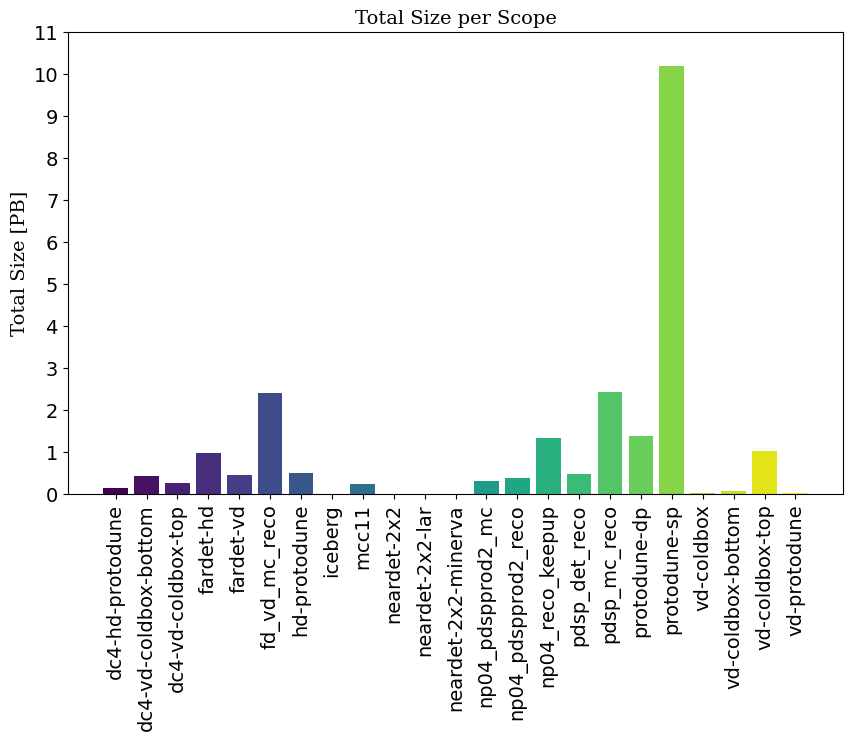

In [4]:
grouped_df = df.groupby('scope')['size'].sum().reset_index()
colors = plt.cm.viridis(np.linspace(0, 1, len(grouped_df)))

plt.figure(figsize=(10, 6))
for i, row in grouped_df.iterrows():
    plt.bar(row['scope'], row['size']/1.0e6, color=colors[i])

#plt.xlabel('Scope')
yticks = np.arange(0, 12, 1)
plt.yticks(yticks)
plt.ylabel('Total Size [PB]', fontdict=font)
plt.title('Total Size per Scope', fontdict=font)
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('scopes.png', bbox_inches='tight')
plt.show()

In [5]:
df_hd = df[df['scope'] == 'fardet-hd']
df_vd = df[df['scope'] == 'fardet-vd']

In [6]:
df_2023a_hd = df_hd[df_hd['dataset'].str.contains('fd_mc_2023a')]
df_2023a_vd = df_vd[df_vd['dataset'].str.contains('fd_mc_2023a')]

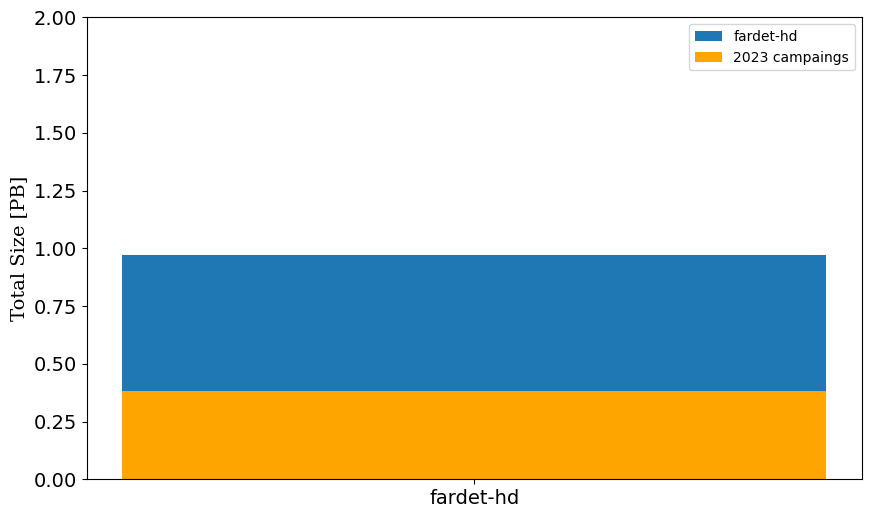

In [7]:
plt.figure(figsize=(10, 6))

plt.bar(df_hd['scope'], df_hd['size'].sum()/1.0e6, label='fardet-hd')
plt.bar(df_2023a_hd['scope'], df_2023a_hd['size'].sum()/1.0e6, label='2023 campaings', color='orange')
plt.legend()
plt.ylabel('Total Size [PB]', fontdict=font)
plt.ylim(0,2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('fardet-hd.png', bbox_inches='tight')
plt.show()

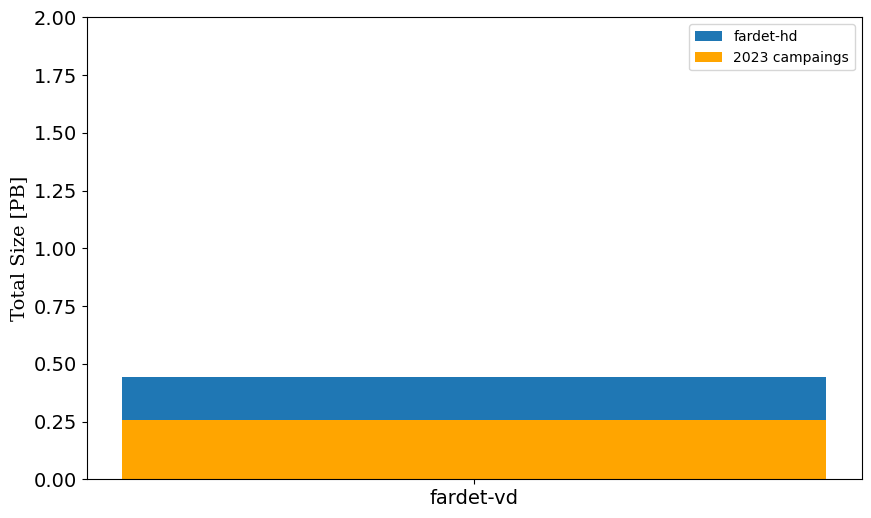

In [15]:
plt.figure(figsize=(10, 6))

plt.bar(df_vd['scope'], df_vd['size'].sum()/1.0e6, label='fardet-hd')
plt.bar(df_2023a_vd['scope'], df_2023a_vd['size'].sum()/1.0e6, label='2023 campaings', color='orange')
plt.legend()
plt.ylabel('Total Size [PB]', fontdict=font)
plt.ylim(0,2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('fardet-vd.png', bbox_inches='tight')
plt.show()

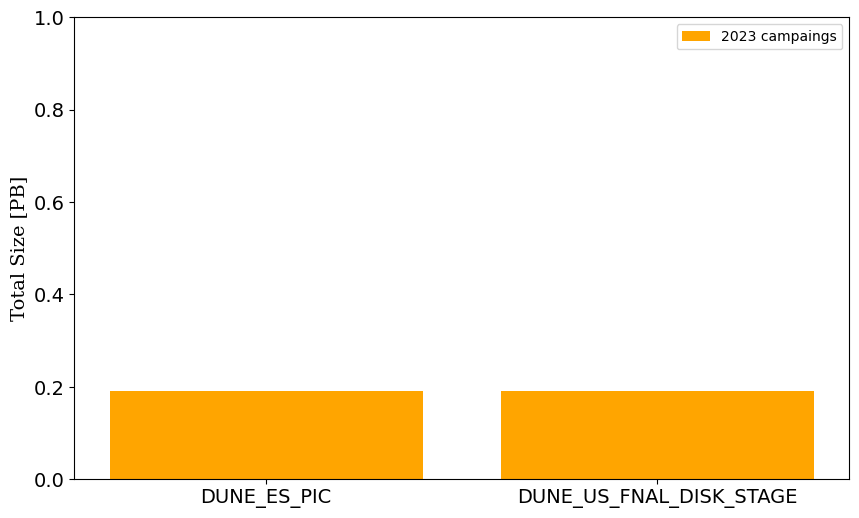

In [8]:
plt.figure(figsize=(10, 6))

grouped_df = df_2023a_hd.groupby('site')['size'].sum().reset_index()

plt.bar(grouped_df['site'], grouped_df['size']/1.0e6, label='2023 campaings', color='orange')
plt.legend()
plt.ylabel('Total Size [PB]', fontdict=font)
plt.ylim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('2023_campaings_hd.png', bbox_inches='tight')
plt.show()

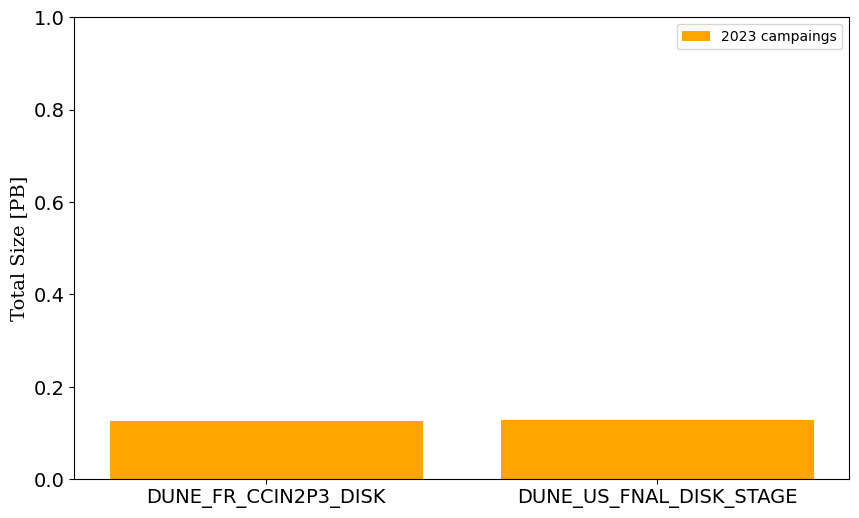

In [9]:
plt.figure(figsize=(10, 6))

grouped_df = df_2023a_vd.groupby('site')['size'].sum().reset_index()

plt.bar(grouped_df['site'], grouped_df['size']/1.0e6, label='2023 campaings', color='orange')
plt.legend()
plt.ylabel('Total Size [PB]', fontdict=font)
plt.ylim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('2023_campaings_vd.png', bbox_inches='tight')
plt.show()

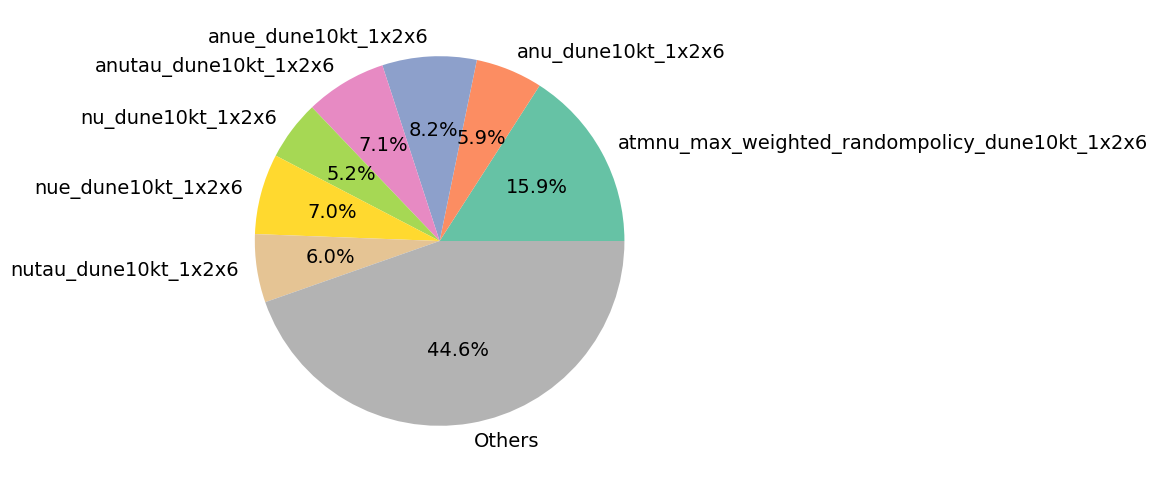

In [14]:
plt.figure(figsize=(10, 6))

grouped_df = df_hd.groupby(['dataset'])['size'].sum().reset_index()
total_size = grouped_df['size'].sum()

grouped_df['percentage'] = (grouped_df['size'] / total_size) * 100

# Filter out small percentages and sum them
small_percentages_sum = grouped_df[grouped_df['percentage'] < 4]['size'].sum()
small_percentages = pd.DataFrame({'dataset': ['Others'], 'size': [small_percentages_sum], 'percentage': [small_percentages_sum / total_size * 100]})

# Filter out larger percentages
large_percentages = grouped_df[grouped_df['percentage'] >= 4]

# Combine the two DataFrames
final_df = pd.concat([large_percentages, small_percentages], ignore_index=True)

labels =["atmnu_max_weighted_randompolicy_dune10kt_1x2x6",
         "anu_dune10kt_1x2x6",
         "anue_dune10kt_1x2x6",
         "anutau_dune10kt_1x2x6",
         "nu_dune10kt_1x2x6",
         "nue_dune10kt_1x2x6",
         "nutau_dune10kt_1x2x6",
         "Others"
        ]
         
plt.pie(final_df['size'], labels=labels, autopct='%1.1f%%', startangle=0, textprops={'color': 'black','fontsize':14}
       ,colors=sns.color_palette('Set2')
)
plt.savefig('fardet_hd_datasets.png', bbox_inches='tight')
plt.show()

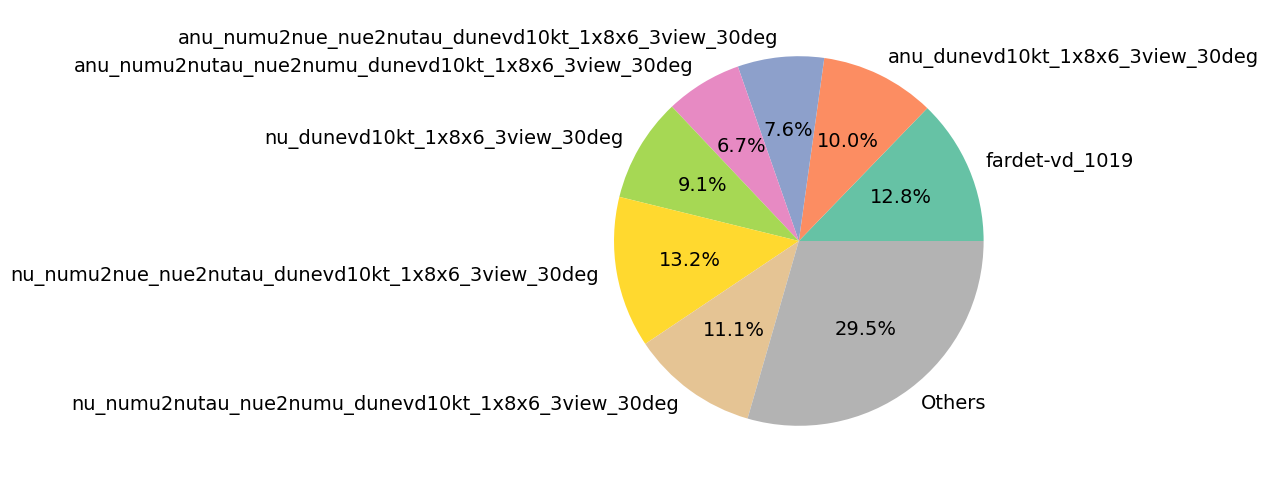

In [13]:
plt.figure(figsize=(10, 6))

grouped_df = df_vd.groupby(['dataset'])['size'].sum().reset_index()
total_size = grouped_df['size'].sum()

grouped_df['percentage'] = (grouped_df['size'] / total_size) * 100

# Filter out small percentages and sum them
small_percentages_sum = grouped_df[grouped_df['percentage'] < 4]['size'].sum()
small_percentages = pd.DataFrame({'dataset': ['Others'], 'size': [small_percentages_sum], 'percentage': [small_percentages_sum / total_size * 100]})

# Filter out larger percentages
large_percentages = grouped_df[grouped_df['percentage'] >= 4]

# Combine the two DataFrames
final_df = pd.concat([large_percentages, small_percentages], ignore_index=True)

labels =["fardet-vd_1019",
         "anu_dunevd10kt_1x8x6_3view_30deg",
         "anu_numu2nue_nue2nutau_dunevd10kt_1x8x6_3view_30deg",
         "anu_numu2nutau_nue2numu_dunevd10kt_1x8x6_3view_30deg",
         "nu_dunevd10kt_1x8x6_3view_30deg",
         "nu_numu2nue_nue2nutau_dunevd10kt_1x8x6_3view_30deg",
         "nu_numu2nutau_nue2numu_dunevd10kt_1x8x6_3view_30deg",
         "Others"
        ]
        
plt.pie(final_df['size'], labels=labels, autopct='%1.1f%%', startangle=0, textprops={'color': 'black','fontsize':14}
       ,colors=sns.color_palette('Set2')
)
plt.savefig('fardet_vd_datasets.png', bbox_inches='tight')
plt.show()